# Exercices d'application de Matplotlib

Il s'agit d'exercices simples, sans intérêt coceptuel particulier, destinés à s'entrainer à utiliser matplotlib.

On importe d'abord les modules et fonctions qui seront utiles.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, pi

## Représentation de fonctions : séries de Fourier

On regarde la fonction $2\pi$-périodique définie par :

$f(t) = \frac{t}{\pi}$  si $t\in[0,\pi]$

$f(t) = 1- \frac{\pi - t}{\pi}$  si $t\in[0,\pi]$

**1.** Faire tracer le graphe de $f$ sur l'intervalle $[0,4\pi]$.

([<matplotlib.axis.XTick at 0x7f84199c3208>,
 <a list of 5 Text xticklabel objects>)

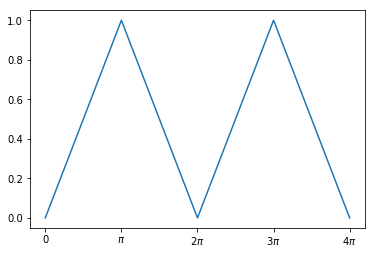

In [3]:
u=pi*np.arange(5)
v=[0,1,0,1,0]
plt.plot(u,v)
plt.xticks(u,["0","$\pi$","$2 \pi$","$3 \pi$","$4 \pi$"])

**2.**  Faire tracer sur le même diagramme le graphe de $f$ et le graphe de :
$$
t\mapsto \frac{1}{2} - \frac{4}{\pi^2} \cos t
$$

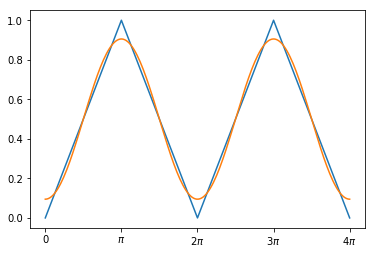

In [4]:
u=pi*np.arange(5)
v=[0,1,0,1,0]
plt.plot(u,v)
plt.xticks(u,["0","$\pi$","$2 \pi$","$3 \pi$","$4 \pi$"])
t = np.linspace(0,4*pi,200)
y = 1/2 - (4/pi**2)*(np.cos(t))
plt.plot(t,y)

On définit la série de Fourier de $f$ tronquée :
$$
F_N(t) = \frac{1}{2} - \frac{4}{\pi^2} 
\left( 
\frac{\cos t}{1} + \frac{\cos 3t}{9}+\cdots + \frac{\cos (2N+1)t}{(2N+1)^2}
\right)
$$

**3.** Ecrire une fonction F, qui prend en argument un entier $N$ et trace sur un même diagramme le graphe de $f$ et celui de $F_N$.

In [5]:
def F(N):
    u=pi*np.arange(5)
    v=[0,1,0,1,0]
    plt.plot(u,v)
    plt.xticks(u,["0","$\pi$","$2 \pi$","$3 \pi$","$4 \pi$"])
    t = np.linspace(0,4*pi,200)
    y = 0.5* np.ones(200)
    for k in range(1,2*N+2,2):
        y -= 4 * np.cos(k*t) / (k*k*pi**2)
    plt.plot(t,y)

Tester cette fonction pour différentes valeurs de $N$.

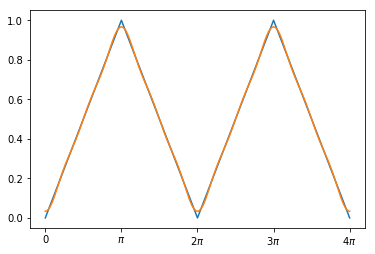

In [6]:
F(2)

Faire de même avec la fonction $2\pi$-périodique $f$ définie par

$f(t) = 0$ si $t = k\pi$

$f(t) = -1$ si $t\in ]-\pi,0[$

$f(t) = -1$ si $t\in ]0,\pi[$


et

$$F_N(t) = \frac{4}{\pi} \left(\sin(\frac{t}{1})+ \sin(\frac{t}{3}) + \cdots + \sin(\frac{t}{2N+1})  \right) $$

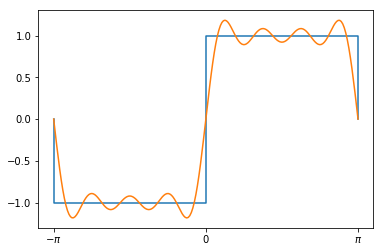

In [7]:

def F(N):
    u = [-pi,-pi,0,0,pi,pi]
    v = [0,-1,-1,1,1,0]
    plt.plot(u,v)
    plt.xticks([-pi,0,pi],["$-\pi$","0","$\pi$"])
    t = np.linspace(-pi,pi,200)
    y = np.zeros(200)
    for k in range(1,2*N+2,2):
        y = y + np.sin(k*t)/k
    plt.plot(t,4*y/pi)
    
F(3)

## Des courbes paramétrées : les courbes de Lissajou.

Ecrire une fonction qui prend en argument des entiers $p$ et $q$ et rend le dessin de la courbe paramétrée 
$t\mapsto(\cos(pt) , \sin(qt))$.

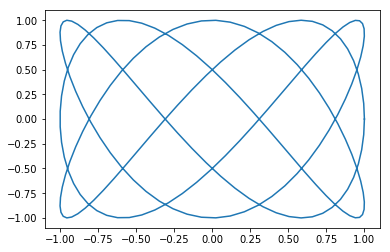

In [8]:
def courbe(p,q):
    t = np.linspace(0,2*pi,200)
    plt.plot(np.cos(p*t),np.sin(q*t))
    
courbe(3,5)

## Un joli dessin

Dessiner le cercle de centre 0 et de rayon 1.

(-1.09986915899354, 1.0999937694758828, -1.099965731583572, 1.099965731583572)

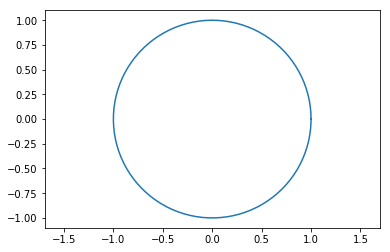

In [9]:
t = np.linspace(0,2*np.pi,200)
plt.plot(np.cos(t),np.sin(t))
plt.axis('equal')

Pour des entiers $n$ et $p$ fixés, et pour tout entier positif $k\leq n$, on définit les points

$$
A_k = \left(\cos(\frac{2k\pi}{n}),\sin(\frac{2k\pi}{n})\right)
\qquad
B_k = \left(\cos(\frac{2kp\pi}{n}),\sin(\frac{2kp\pi}{n})\right)
$$

Faire tracer sur un même diagramme le cercle précédent, et tous les segments $[A_k,B_k]$, et tester pour différentes valeurs de $n$ et $p$.

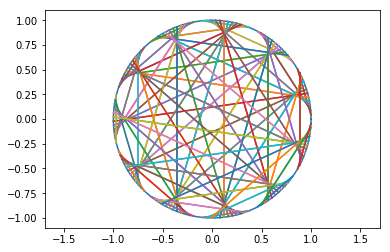

In [16]:
def joli_dessin(n,p):
    t = np.linspace(0,2*np.pi,200)
    plt.plot(np.cos(t),np.sin(t))
    plt.axis('equal')
    theta = 2*np.pi/n
    for k in range(n):
        angles = [k * theta, k*p*theta]
        plt.plot(np.cos(angles),np.sin(angles))
        
joli_dessin(143,12)

## Une échelle qui tombe.

Une échelle est posée vericalement contre un mur. Le pied de l'échelle se met à glisser sur le sol, et s'éloigne du mur, alors que le sommet de l'échelle glisse le long du mur.

Essayer de visualiser le phénoméne.

(-0.05, 1.05, -0.05, 1.05)

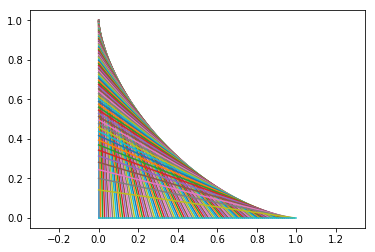

In [11]:
for x in np.linspace(0,1,100):
    plt.plot([0,x],[sqrt(1-x*x),0])
plt.axis("equal")

## Visaliser la vitesse de convergence d'une suite.

Pour un réel $a\in [1,\sqrt{2}]$ donné, on veut étudier la suite $(u_n)$ par $u_0=a$ et $u_{n+1}= u_n - (u_n^2-2)/4$.

**1.** Définir d'abord une fonction `suite(a,N)` qui prend $a$ et $N$ en arguments et rend la liste $(u_0,\ldots,u_N)$.

In [12]:
def suite(a,N):
    u = a
    l=[u]
    for i in range(N):
        u = u-(u*u-2)/4
        l. append(u)
    return l

**2.** Tester cette fonction.

In [13]:
suite(1.1,15)

[1.1,
 1.2975,
 1.3766234375000002,
 1.402850415331421,
 1.4108530933825358,
 1.4132264806057682,
 1.4139242092344269,
 1.414128791869627,
 1.4141887318709643,
 1.4142062895332628,
 1.414211432194403,
 1.4142129384570667,
 1.414213379632224,
 1.414213508849525,
 1.4142135466964036,
 1.4142135577814985]

**3.** On remarque que cette suite semble semble converger vers $\sqrt{2}$. Utiliser un graphique pour mettre ceci en évidence. Prendre par exemple $u_0 = 1.1$.

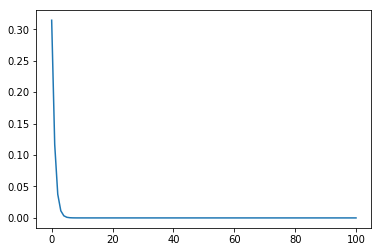

In [14]:
u0 = 1.1
N = 100

x=range(N+1)
limite = sqrt(2)
y= [limite - u for u in suite(u0,N)]
plt.plot(x,y)

**4.** Pour quantifier la vitesse de convergence de $(u_n)$ vers $\sqrt{2}$, faites tracer ce même graphique en utilisant une échelle logarithmique.

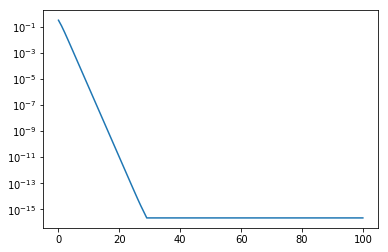

In [15]:
u0 = 1.1
N = 100

x=range(N+1)
limite = sqrt(2)
y= [limite - u for u in suite(u0,N)]
plt.plot(x,y)
plt.yscale("log")